If you are running on HPC, Please specify all packages here as a jupyter notebook install or module load

In [ ]:
# !module load anaconda/2021.11
# !module load cuda/12.2
# !nvidia-smi
# !nvcc --version
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/tuftshomework/ee193')

Mounted at /content/drive


**NO HPC -5**

In [ ]:
## Specify your pip install and module load here

In [1]:
## Your potential Task:
##Your Package imported

## For your reference, here is the package I am using

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd


In [2]:
!nvidia-smi

Fri Mar 14 17:16:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   44C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Load Cifar 10 dataset

In [3]:
# You can also write your own data loading code

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 170M/170M [00:54<00:00, 3.13MB/s]


**Clarify the architecture1 you are using:  model (VGG, ResNet, even Vision Transformer)**

In [ ]:
## Your task: Complete your architecture
## Code Starting Here


####

Your Training Code

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## Code Starting Here


####


Your Testing Code

In [ ]:
## Code Starting Here


####

Save Your Model

In [ ]:
# torch.save(model.state_dict(), './model_architecture_1.pth')

## Save your log file and upload to Canvas
# Your Code Here

###

**Clarify the architecture2 you are using:  Input -> Conv Layer 1 -> Max Pooling -> Conv Layer 2 -> Max Pooling -> Conv Layer 3 -> Max Pooling -> Flatten -> FC1 -> FC2 -> Output**

In [4]:
## Your task: Complete your architecture
## Code Starting Here

class MyCNN(nn.Module):
# Your Code Here

    def __init__(self):
        super(MyCNN, self).__init__()
        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)  # Conv Layer 1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) # Conv Layer 2
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1) # Conv Layer 3

        # Max Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # FC1 (Flattening 4x4 feature maps)
        self.fc2 = nn.Linear(256, 128)  # FC2
        self.fc3 = nn.Linear(128, 10)   # Output layer (10 classes for CIFAR-10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 -> ReLU -> Pool

        x = torch.flatten(x, start_dim=1)  # Flatten for FC layers

        x = F.relu(self.fc1(x))  # Fully Connected Layer 1
        x = F.relu(self.fc2(x))  # Fully Connected Layer 2
        x = self.fc3(x)  # Output Layer

        return x

# Initialize Model
model = MyCNN()
print(model)



model = MyCNN()
print(model)
####

MyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
MyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_feat

If you successfully write your model architecture, run the following training code with testing

In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# you can adjust the hyperparameters by yourself
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # use your own learning rate

num_epochs = 10  # use your own epoch
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    # Train
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

print('Finished Training')

Epoch 1/10, Loss: 1.452, Test Accuracy: 60.44%
Epoch 2/10, Loss: 0.983, Test Accuracy: 67.50%
Epoch 3/10, Loss: 0.784, Test Accuracy: 71.15%
Epoch 4/10, Loss: 0.660, Test Accuracy: 74.95%
Epoch 5/10, Loss: 0.557, Test Accuracy: 75.17%
Epoch 6/10, Loss: 0.477, Test Accuracy: 74.68%
Epoch 7/10, Loss: 0.396, Test Accuracy: 75.03%
Epoch 8/10, Loss: 0.327, Test Accuracy: 74.62%
Epoch 9/10, Loss: 0.271, Test Accuracy: 75.87%
Epoch 10/10, Loss: 0.218, Test Accuracy: 75.93%
Finished Training


Visualization

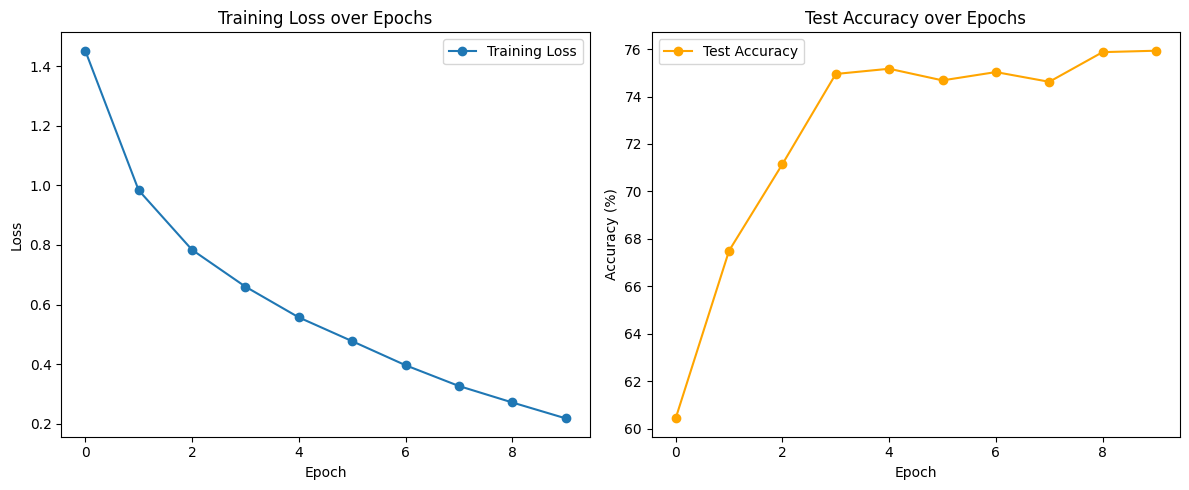

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()

# plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o', color='orange', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Save Model

In [7]:
torch.save(model.state_dict(), './model_architecture_2.pth')

## Save your log file, and make sure you can load the model as well

## Your saved model can be used in future assignments


Hyperparameter Tuning (you can do manual hyperparameter adjustment as well. No panelty.)

In [ ]:
# !pip install optuna

In [ ]:

## Code Starting Here


####

**Assignment3: Adversarial Example**

0. Load your pre-trained Model

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyCNN().to(device)
model.load_state_dict(torch.load('./model_architecture_2.pth', map_location=device))
model.eval()


classes = testset.classes

Define the Lp distance you would like to use. L2 is recommended.

In [9]:
def compute_lp_distance(perturbation):

    # TODO: define you Lp
# Your Code Here



    distance = torch.norm(perturbation, p=2, dim=(1, 2, 3))


###
    return distance

1. Adversarial Example Generation

In [10]:
def generate_adversarial(model, image, label, epsilon, device,alpha=0.001):
# Your Code Here
    # Set model to evaluation mode
    model.eval()
    criterion = nn.CrossEntropyLoss()
    num_steps=50

    # Clone image to avoid modifying the original
    adv_image = image.clone()
    label = label.to(device)
    adv_image.requires_grad = True

    for step in range(num_steps):
        outputs = model(adv_image)
        loss = criterion(outputs, label)

        # Compute gradient
        model.zero_grad()
        loss.backward()
        gradient = adv_image.grad.data

        # PGD Step with L-infinity projection
        perturbation = alpha * gradient.sign()
        adv_image = adv_image + perturbation
        # adv_image = torch.clamp(adv_image, image - epsilon, image + epsilon)
        adv_image = torch.clamp(adv_image, adv_image - epsilon, adv_image + epsilon)
        adv_image = torch.clamp(adv_image, -1, 1)
        adv_image = adv_image.detach().clone()
        adv_image.requires_grad = True

        # Stop if misclassified
        _, predicted = torch.max(outputs, 1)
        if predicted[0].item() != label[0].item():
            break

    perturbation = adv_image - image
    distance = compute_lp_distance(perturbation)

    return adv_image, perturbation, distance


dataiter = iter(testloader)
original, label = next(dataiter)
original, label = original.to(device), label.to(device)

dataiter = iter(testloader)
original, label = next(dataiter)
original, label = original.to(device), label.to(device)

epsilon = 0.05   ## Adjust your own epsilon here

adv_image, perturbation, distance = generate_adversarial(model, original, label, epsilon, device)

global_original = original.detach()
global_adv = adv_image.detach()
global_perturbation = perturbation.detach()


print("adversarial example generated")

adversarial example generated


3. perturbed image Visualization

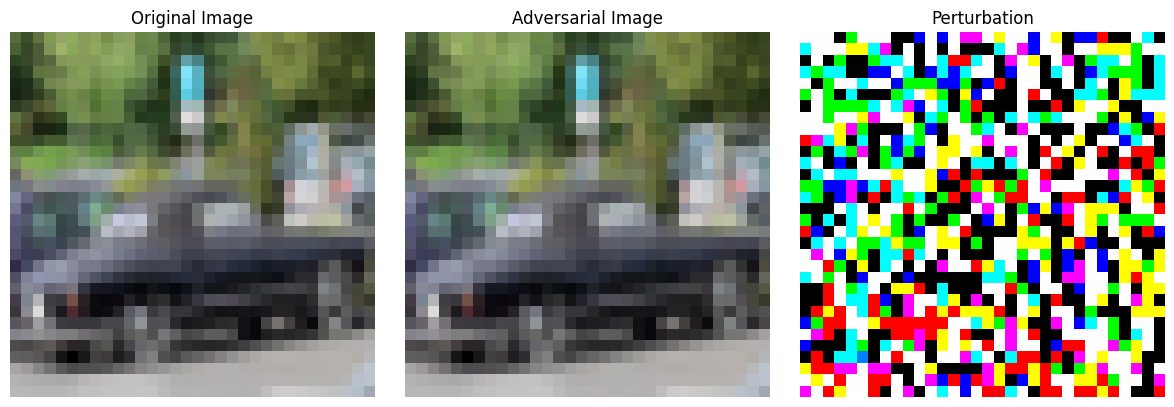

In [11]:
# === visualize_adversarial.py ===
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):

    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

try:
    global_original
    global_adv
    global_perturbation
except NameError:
    raise NameError("makesure global_original, global_adv, global_perturbation has defined")


orig_img = imshow(global_original[0])
adv_img = imshow(global_adv[0])

pert = global_perturbation[0].detach().cpu().numpy()
pert = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
pert = np.transpose(pert, (1, 2, 0))


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(orig_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(adv_img)
plt.title("Adversarial Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pert)
plt.title("Perturbation")
plt.axis('off')

plt.tight_layout()
plt.show()

4. Classification Result

In [12]:
with torch.no_grad():
    output_orig = model(global_original)
    _, pred_orig = torch.max(output_orig.data, 1)
    output_adv = model(global_adv)
    _, pred_adv = torch.max(output_adv.data, 1)

# Ensure the 'classes' variable is defined by reloading it if necessary.
try:
    classes
except NameError:
    classes = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform).classes

print("Original image predicted as:", classes[pred_orig[0].item()])
print("Adversarial image predicted as:", classes[pred_adv[0].item()])

Original image predicted as: truck
Adversarial image predicted as: truck


**Unsuccessful Misclassification**

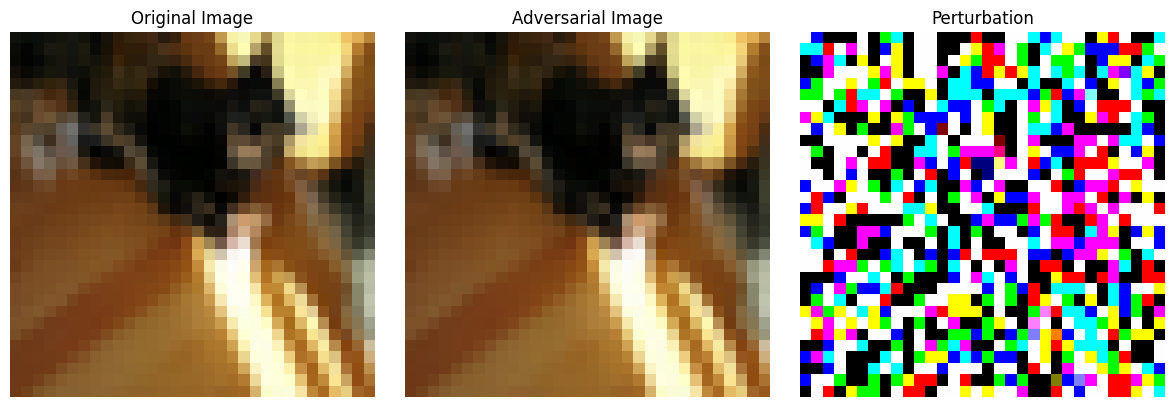

Original image predicted as: dog
Adversarial image predicted as: dog


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [15]:
# === visualize_adversarial_multi.py ===
# Your Code Here

correct_predictions = None
original_images = None
original_predictions = None
adv_images = None
adv_predictions = None


label_classes=[]
distance_total=0

for original, label in testloader:
    if label not in label_classes:
        original = original.to(device)
        label_classes.append(label)
        label = label.to(device)
        adv_image, perturbation, distance = generate_adversarial(model, original, label, epsilon, device)
        distance_total=distance_total+distance
        global_original = original.detach()
        global_adv = adv_image.detach()
        global_perturbation = perturbation.detach()


        try:
            global_original
            global_adv
            global_perturbation
        except NameError:
            raise NameError("makesure global_original, global_adv, global_perturbation has defined")


        orig_img = imshow(global_original[0])
        adv_img = imshow(global_adv[0])

        pert = global_perturbation[0].detach().cpu().numpy()
        pert = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
        pert = np.transpose(pert, (1, 2, 0))


        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(orig_img)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(adv_img)
        plt.title("Adversarial Image")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(pert)
        plt.title("Perturbation")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        with torch.no_grad():
            output_orig = model(original)
            _, pred_orig = torch.max(output_orig.data, 1)
            output_adv = model(adv_image)
            _, pred_adv = torch.max(output_adv.data, 1)

        try:
            classes
        except NameError:
            classes = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform).classes

        print("Original image predicted as:", classes[pred_orig[0].item()])
        print("Adversarial image predicted as:", classes[pred_adv[0].item()])

        if original_images is None:
            correct_predictions = label
            original_images = original
            original_predictions = pred_orig
            adv_images = adv_image
            adv_predictions = pred_adv
        else:
            correct_predictions = torch.cat((correct_predictions, label), 0)
            original_images = torch.cat((original_images, original), dim=0)
            original_predictions = torch.cat((original_predictions, pred_orig), dim=0)
            adv_images = torch.cat((adv_images, adv_image), dim=0)
            adv_predictions = torch.cat((adv_predictions, pred_adv), dim=0)




**Incomplete visualization**

In [ ]:
print("distance average:",(distance_total/10).detach().cpu().item())

\\5. Applying your perturbation to 10 classes and compute the Lp distance as well as its average

> Add blockquote



**Incomplete L2 compute**

10


**Grading**

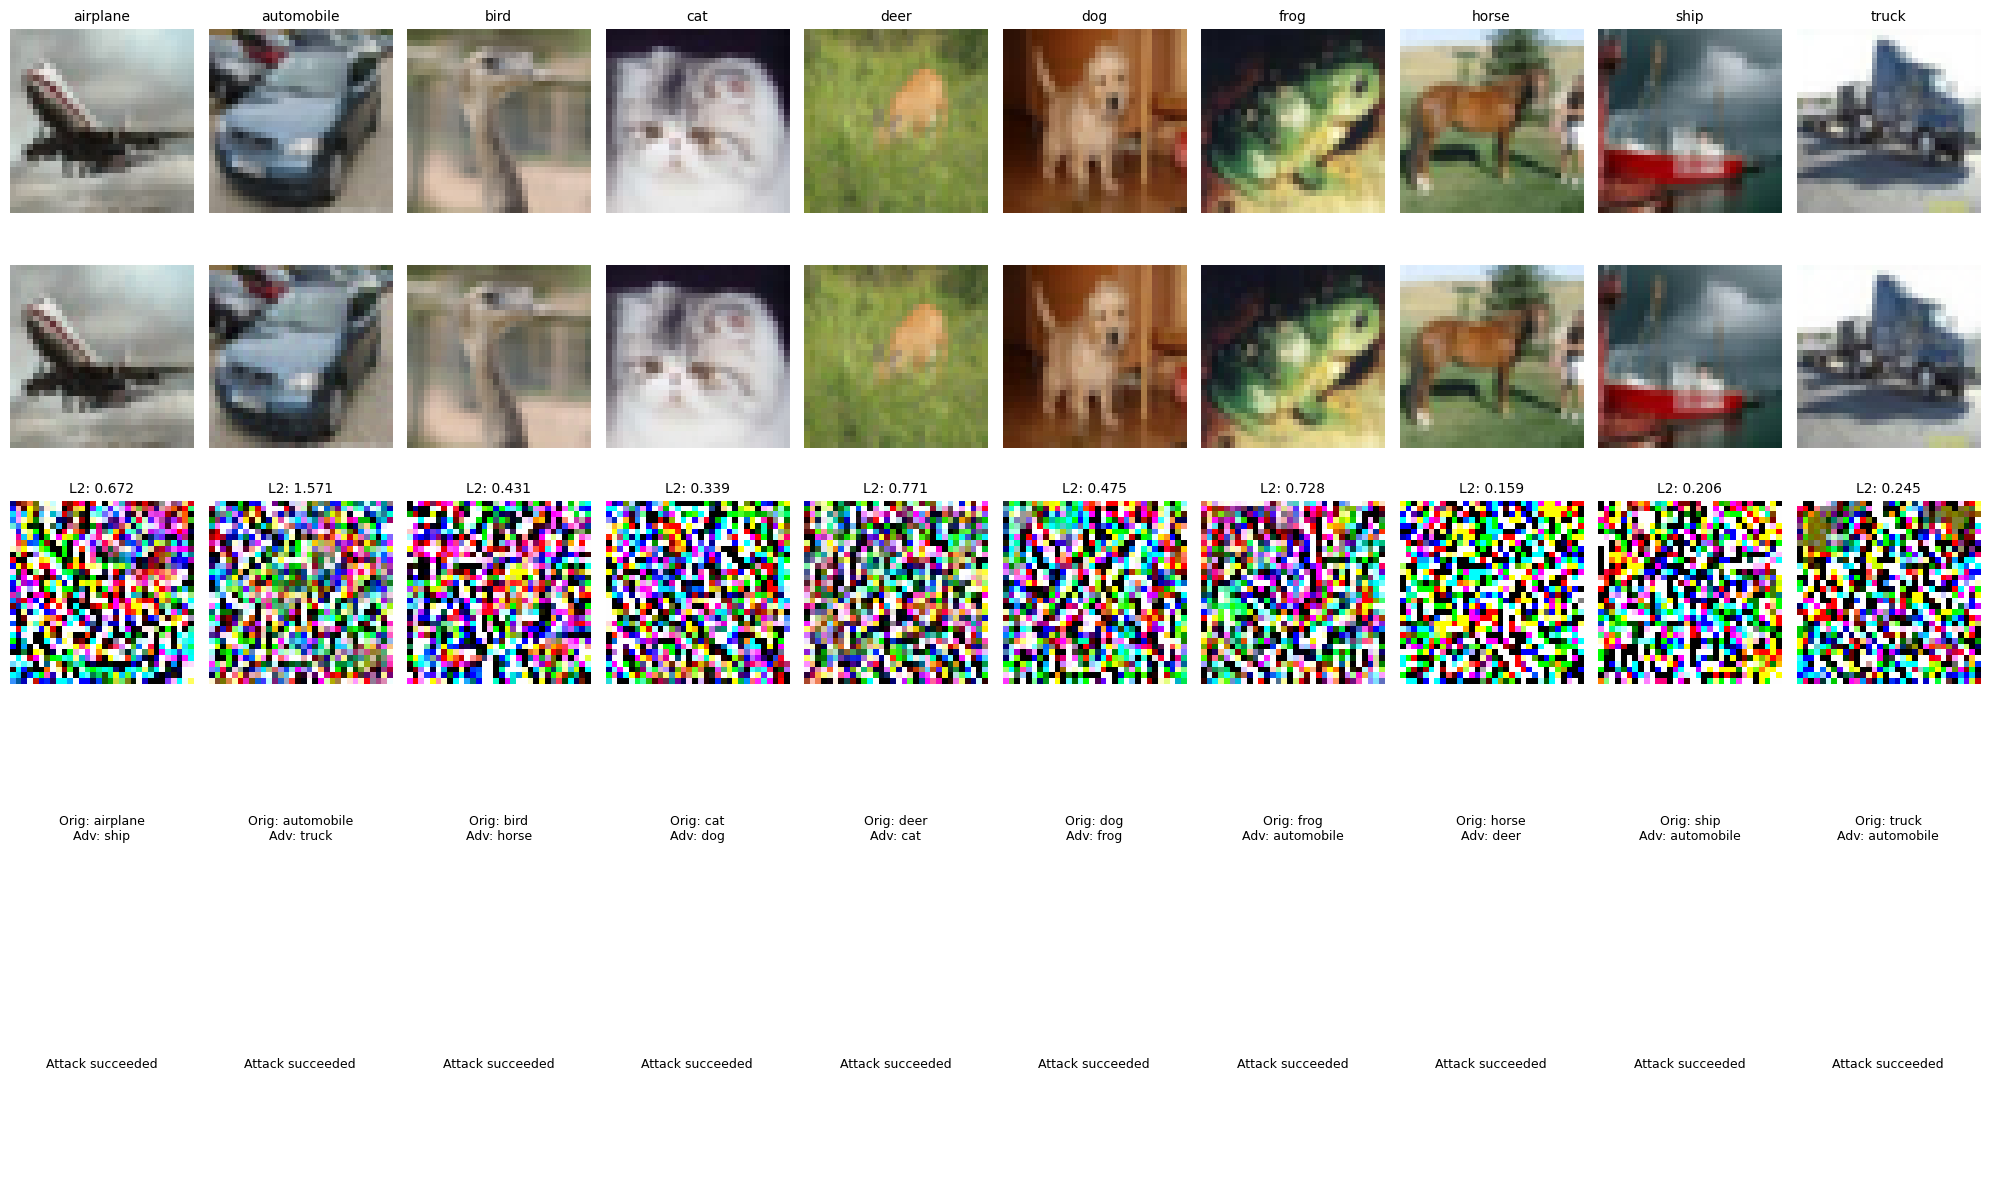

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

# Fix random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Group indices for each class from the testset
class_indices = {i: [] for i in range(10)}
for idx, (img, label) in enumerate(testset):
    class_indices[label].append(idx)

# Randomly select one index per class using the fixed random seed
selected_indices = {}
for cls in range(10):
    selected_indices[cls] = random.choice(class_indices[cls])

# Generate adversarial examples for each selected image
original_images = []
adv_images = []
perturbations = []
distances = []
selected_labels = []

for cls in range(10):
    idx = selected_indices[cls]
    img, label = testset[idx]
    selected_labels.append(label)

    # Prepare the image and label with a batch dimension and send to device
    img_batch = img.unsqueeze(0).to(device)
    label_tensor = torch.tensor([label]).to(device)

    # Generate adversarial example
    adv_img, perturbation, distance = generate_adversarial(model, img_batch, label_tensor, epsilon, device)

    original_images.append(img)
    adv_images.append(adv_img.squeeze(0).detach().cpu())
    perturbations.append(perturbation.squeeze(0).detach().cpu())
    distances.append(distance.item())

# Helper function for visualization: reverse normalization
def imshow(img):
    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

# --- Compute classification results for each image ---
original_preds = []
adv_preds = []

for i in range(10):
    orig_img = original_images[i]
    adv_img = adv_images[i]

    # Ensure the image has a batch dimension
    if orig_img.dim() == 3:
        orig_img_batch = orig_img.unsqueeze(0).to(device)
    else:
        orig_img_batch = orig_img.to(device)

    if adv_img.dim() == 3:
        adv_img_batch = adv_img.unsqueeze(0).to(device)
    else:
        adv_img_batch = adv_img.to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        output_orig = model(orig_img_batch)
        output_adv = model(adv_img_batch)

    _, pred_orig = torch.max(output_orig, 1)
    _, pred_adv = torch.max(output_adv, 1)

    original_preds.append(classes[pred_orig.item()])
    adv_preds.append(classes[pred_adv.item()])

# Determine attack result for each image
attack_results = []
for orig, adv in zip(original_preds, adv_preds):
    if orig != adv:
        attack_results.append("Attack succeeded")
    else:
        attack_results.append("No attack")

# --- Plotting: 5 rows x 10 columns ---


fig, axes = plt.subplots(5, 10, figsize=(20, 12))

for i in range(10):
    # Row 0: Original image with true class title
    axes[0, i].imshow(imshow(original_images[i]))
    axes[0, i].axis('off')
    axes[0, i].set_title(f"{classes[selected_labels[i]]}", fontsize=10)

    # Row 1: Adversarial image
    axes[1, i].imshow(imshow(adv_images[i]))
    axes[1, i].axis('off')

    # Row 2: Perturbation visualization (normalized for display) with L2 distance in title
    pert = perturbations[i].numpy()
    pert_norm = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
    pert_norm = np.transpose(pert_norm, (1, 2, 0))
    axes[2, i].imshow(pert_norm)
    axes[2, i].axis('off')
    axes[2, i].set_title(f"L2: {distances[i]:.3f}", fontsize=10)

    # Row 3: Classification results text
    text_line = f"Orig: {original_preds[i]}\nAdv: {adv_preds[i]}"
    axes[3, i].text(0.5, 0.5, text_line, fontsize=9, ha='center', va='center')
    axes[3, i].axis('off')

    # Row 4: Attack comparison result text
    axes[4, i].text(0.5, 0.5, attack_results[i], fontsize=9, ha='center', va='center')
    axes[4, i].axis('off')

plt.tight_layout()
plt.show()

**Very Good ASR**

Overall 85